# Final Project for HE3022

## 1) Introduction 

* We will be analysing the effects of the Tax Cuts and Jobs Act (2017) in the United States. It is enacted under the Trump administration, and the TCJA made comprehensive changes to both individual and corporate income tax regulations. In this analysis, we will only look at individual tax rates and its impacts on income distribution.

### Overview

* Data Preprocessing
    - Dataset we will be using is from the Congressional Budget Office Website https://www.cbo.gov/publication/56575

In [1]:
#import relavant libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## 2) Data Preprocessing and Function Preparation 

In [2]:
!pip install xlrd openpyxl

In [3]:
#importing data 
df = pd.read_excel('56575-supplemental-data.xlsx', skiprows=10, nrows=410, sheet_name='5. Income Before Trans + Tax', engine='openpyxl')
display(df)

,Year,Income Before\n Transfers and\n Taxes,Unnamed: 2,Market Income,Cash Wages\n and Salaries,Employee's\nContributions to\nDeferred\nCompensation Plans,Employer's\nContributions to\nHealth\nInsurance,Employer's\nShare of Payroll\nTaxes Borne by\nLabor,Federal\nUnemployment\n Tax Borne by\nLabor\t,Corporate Tax\n Borne by Labor,...,Dividends,Positive Rental\n Income,Corporate Tax\n Borne by\n Capital,Other Market\n Income,Unnamed: 18,Social\n Insurance\n Benefits,Social Security,Medicare,Unemployment\n Insurance,Workers'\n Compensation
0,NaN,All Quintiles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979.0,67000,NaN,62300.0,43300.0,0.0,1900.0,2200.0,100.0,600.0,...,1200.0,600.0,1700.0,2500.0,NaN,4700.0,3400.0,900.0,300.0,100.0
2,1980.0,65100,NaN,60100.0,42100.0,0.0,1600.0,2100.0,100.0,500.0,...,1300.0,600.0,1400.0,2400.0,NaN,5000.0,3500.0,1000.0,400.0,100.0
3,1981.0,65400,NaN,60100.0,41900.0,0.0,1600.0,2300.0,100.0,400.0,...,1400.0,600.0,1100.0,2500.0,NaN,5300.0,3700.0,1100.0,400.0,100.0
4,1982.0,65500,NaN,59700.0,41600.0,0.0,1800.0,2300.0,100.0,200.0,...,1400.0,600.0,700.0,2400.0,NaN,5800.0,3800.0,1200.0,500.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,2014.0,1827300,NaN,1817600.0,569400.0,11800.0,7500.0,14400.0,100.0,6400.0,...,104500.0,31900.0,127500.0,55900.0,NaN,9700.0,6200.0,3300.0,100.0,100.0
406,2015.0,1908300,NaN,1897700.0,601600.0,12800.0,7500.0,15700.0,100.0,6300.0,...,108200.0,25800.0,126000.0,58100.0,NaN,10600.0,6800.0,3600.0,100.0,0.0
407,2016.0,1814400,NaN,1804600.0,583100.0,12900.0,8200.0,15600.0,100.0,5700.0,...,101800.0,22900.0,118100.0,56500.0,NaN,9700.0,6100.0,3600.0,100.0,0.0
408,2017.0,1961500,NaN,1950000.0,607600.0,12700.0,7600.0,16200.0,100.0,4500.0,...,108400.0,24900.0,89700.0,58700.0,NaN,11600.0,7400.0,4100.0,100.0,0.0


## 2a) Data Cleaning

In [4]:
#Cleaning headings so it is more presentable
df.rename(index={0: "All Quintiles"}, inplace=True)
display(df)

,Year,Income Before\n Transfers and\n Taxes,Unnamed: 2,Market Income,Cash Wages\n and Salaries,Employee's\nContributions to\nDeferred\nCompensation Plans,Employer's\nContributions to\nHealth\nInsurance,Employer's\nShare of Payroll\nTaxes Borne by\nLabor,Federal\nUnemployment\n Tax Borne by\nLabor\t,Corporate Tax\n Borne by Labor,...,Dividends,Positive Rental\n Income,Corporate Tax\n Borne by\n Capital,Other Market\n Income,Unnamed: 18,Social\n Insurance\n Benefits,Social Security,Medicare,Unemployment\n Insurance,Workers'\n Compensation
All Quintiles,NaN,All Quintiles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979.0,67000,NaN,62300.0,43300.0,0.0,1900.0,2200.0,100.0,600.0,...,1200.0,600.0,1700.0,2500.0,NaN,4700.0,3400.0,900.0,300.0,100.0
2,1980.0,65100,NaN,60100.0,42100.0,0.0,1600.0,2100.0,100.0,500.0,...,1300.0,600.0,1400.0,2400.0,NaN,5000.0,3500.0,1000.0,400.0,100.0
3,1981.0,65400,NaN,60100.0,41900.0,0.0,1600.0,2300.0,100.0,400.0,...,1400.0,600.0,1100.0,2500.0,NaN,5300.0,3700.0,1100.0,400.0,100.0
4,1982.0,65500,NaN,59700.0,41600.0,0.0,1800.0,2300.0,100.0,200.0,...,1400.0,600.0,700.0,2400.0,NaN,5800.0,3800.0,1200.0,500.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,2014.0,1827300,NaN,1817600.0,569400.0,11800.0,7500.0,14400.0,100.0,6400.0,...,104500.0,31900.0,127500.0,55900.0,NaN,9700.0,6200.0,3300.0,100.0,100.0
406,2015.0,1908300,NaN,1897700.0,601600.0,12800.0,7500.0,15700.0,100.0,6300.0,...,108200.0,25800.0,126000.0,58100.0,NaN,10600.0,6800.0,3600.0,100.0,0.0
407,2016.0,1814400,NaN,1804600.0,583100.0,12900.0,8200.0,15600.0,100.0,5700.0,...,101800.0,22900.0,118100.0,56500.0,NaN,9700.0,6100.0,3600.0,100.0,0.0
408,2017.0,1961500,NaN,1950000.0,607600.0,12700.0,7600.0,16200.0,100.0,4500.0,...,108400.0,24900.0,89700.0,58700.0,NaN,11600.0,7400.0,4100.0,100.0,0.0


In [5]:
#leave only 2017 data as well as quintile data, we are not concerned with the breakdown of top 10%
filtered_df = df[df["Year"].astype(str).str.contains("2017")]
cols_to_drop = [col for col in filtered_df.columns if 'Unnamed' in col]
filtered_df = filtered_df.drop(columns=cols_to_drop)
filtered_df = filtered_df.reset_index(drop=True) #relabel rows
filtered_df = filtered_df.drop(index=range(6,10))

#adding label to each row
filtered_df.at[0, 'Label'] = "All Quintile"
filtered_df.at[1, 'Label'] = "Lowest Quintile"
filtered_df.at[2, 'Label'] = "2nd Quintile"
filtered_df.at[3, 'Label'] = "3rd Quintile"
filtered_df.at[4, 'Label'] = "4th Quintile"
filtered_df.at[5, 'Label'] = "Highest Quintile"

display(filtered_df)

,Year,Income Before\n Transfers and\n Taxes,Market Income,Cash Wages\n and Salaries,Employee's\nContributions to\nDeferred\nCompensation Plans,Employer's\nContributions to\nHealth\nInsurance,Employer's\nShare of Payroll\nTaxes Borne by\nLabor,Federal\nUnemployment\n Tax Borne by\nLabor\t,Corporate Tax\n Borne by Labor,Business\n Income,...,Dividends,Positive Rental\n Income,Corporate Tax\n Borne by\n Capital,Other Market\n Income,Social\n Insurance\n Benefits,Social Security,Medicare,Unemployment\n Insurance,Workers'\n Compensation,Label
0,2017.0,110700,99600.0,59800.0,2300.0,3800.0,4000.0,0.0,500.0,8100.0,...,2200.0,800.0,1500.0,8400.0,11100.0,6700.0,4000.0,200.0,100.0,All Quintile
1,2017.0,21300,15900.0,11300.0,100.0,700.0,800.0,0.0,100.0,1700.0,...,100.0,100.0,0.0,900.0,5400.0,2500.0,2700.0,100.0,0.0,Lowest Quintile
2,2017.0,46500,33800.0,24000.0,300.0,2100.0,1800.0,0.0,200.0,1500.0,...,200.0,200.0,100.0,3100.0,12700.0,7600.0,4700.0,200.0,100.0,2nd Quintile
3,2017.0,74900,61700.0,42200.0,900.0,3600.0,3200.0,100.0,400.0,1900.0,...,500.0,300.0,200.0,7700.0,13200.0,8100.0,4700.0,200.0,100.0,3rd Quintile
4,2017.0,113400,100700.0,67500.0,2400.0,5200.0,5100.0,100.0,600.0,3000.0,...,900.0,600.0,500.0,13400.0,12700.0,8000.0,4300.0,200.0,200.0,4th Quintile
5,2017.0,309400,298200.0,156200.0,8100.0,7300.0,9300.0,100.0,1300.0,35700.0,...,9400.0,3000.0,6500.0,24300.0,11300.0,7200.0,3800.0,200.0,100.0,Highest Quintile


In [6]:
#income thresholds
inc_1 = 21300
inc_2 = 46500
inc_3 = 74900
inc_4 = 113400
inc_5 = 309400

ave_income = 110700
gini=0.434 #https://www.pewresearch.org/social-trends/2020/01/09/trends-in-income-and-wealth-inequality/#:~:text=Ranging%20from%200%20to%201,Cooperation%20and%20Development%20(OECD).

### 2b) Generating Gamma Function

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta as beta_fn
from scipy.optimize import root_scalar

np.random.seed(0) 
def fgamma(phi):
    return gini - (1 / (phi * 4**phi)) * 1 / beta_fn(phi, phi + 1)

result = root_scalar(fgamma, bracket=[0.000001, 100], method='brentq')
phi = result.root

beta_value = (1 / phi) * ave_income

population = np.random.gamma(phi, beta_value, 10000000)  # 10 million samples


### 2c) Generate Population Income Density

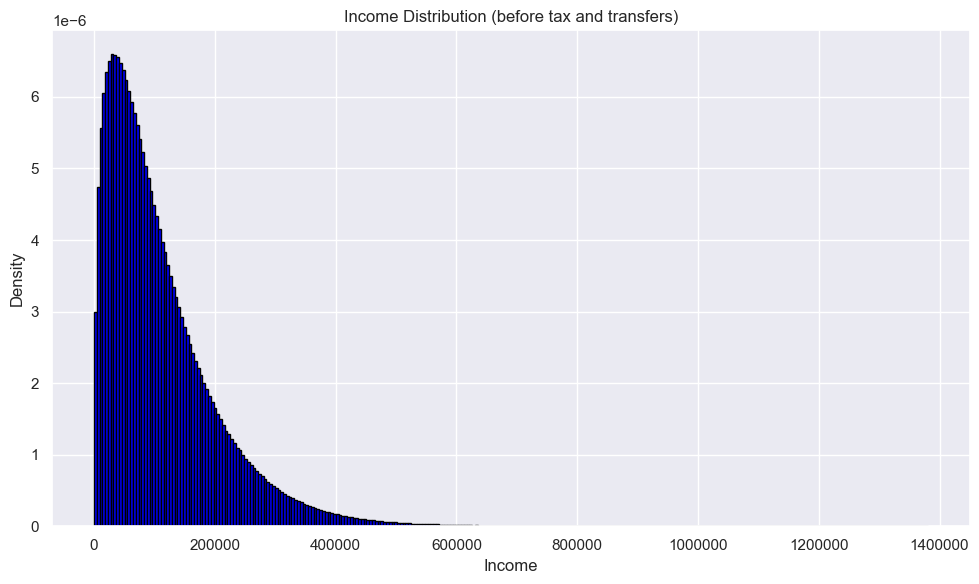

In [8]:
def fgamma(phi):
    return gini - (1 / (phi * 4**phi)) * 1 / beta_fn(phi, phi + 1)

result = root_scalar(fgamma, bracket=[0.000001, 100], method='brentq')
phi = result.root
beta = (1 / phi) * ave_income

# Generate the population with their respective incomes
population = np.random.gamma(phi, beta, 10000000)  # 10 million samples

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(population, bins=300, color='blue', edgecolor='black', density=True)
plt.title('Income Distribution (before tax and transfers)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.gca().ticklabel_format(axis='x', style='plain', useOffset=False)
plt.grid(True)
plt.tight_layout()
plt.show()

* Most of the population income is from 0 to 500,000, lets set a limit on x so the bins are easier to see

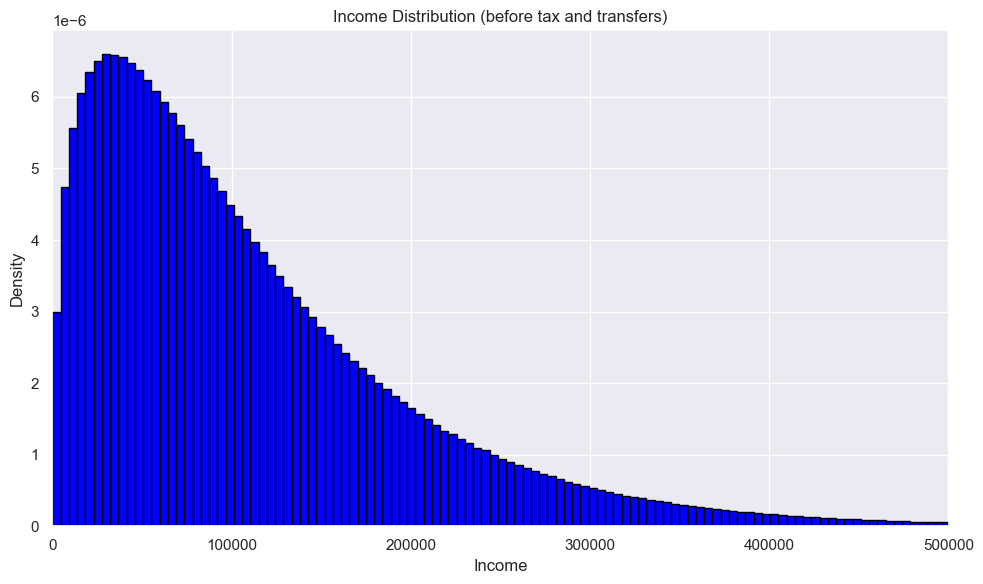

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(population, bins=300, color='blue', edgecolor='black', density=True)
plt.title('Income Distribution (before tax and transfers)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.gca().ticklabel_format(axis='x', style='plain', useOffset=False)
plt.grid(True)
plt.xlim(0, 500000)  # Setting the x-axis limit from 0 to 500000,000
plt.tight_layout()
plt.show()

## 3) Analysis of Tax Cuts and Job Act

* Assumption: We will only analyse the impact of tax rates on heads of households, as there are different tax rates for single filers, married individuals filing jointly (and surviving spouses), married individuals filing separately and heads of household

### 3a) Individual Income Tax <u>before</u> Tax Cuts and Job Act 

Source: https://taxfoundation.org/data/all/federal/2017-tax-brackets/

For Heads of Household:

10% on income over 0 up to 13,350   
15% on income over 13,350 up to 50,800  
25% on income over 50,800 up to 131,200  
28% on income over 131,200 up to 212,500  
33% on income over 212,500 up to 416,700  
35% on income over 416,700 up to 444,550  
39.6% on income over 444,550

In [10]:
#Function for old tax rate
def calculate_tax(income):
    if income <= 13_350:
        return 0.10 * income
    elif income <= 50_800:
        return 0.10 * 13_350 + 0.15 * (income - 13_350)
    elif income <= 131_200:
        return 0.10 * 13_350 + 0.15 * (50_800 - 13_350) + 0.25 * (income - 50_800)
    elif income <= 212_500:
        return 0.10 * 13_350 + 0.15 * (50_800 - 13_350) + 0.25 * (131_200 - 50_800) + 0.28 * (income - 131_200)
    elif income <= 416_700:
        return 0.10 * 13_350 + 0.15 * (50_800 - 13_350) + 0.25 * (131_200 - 50_800) + 0.28 * (212_500 - 131_200) + 0.33 * (income - 212_500)
    elif income <= 444_550:
        return 0.10 * 13_350 + 0.15 * (50_800 - 13_350) + 0.25 * (131_200 - 50_800) + 0.28 * (212_500 - 131_200) + 0.33 * (416_700 - 212_500) + 0.35 * (income - 416_700)
    else:
        return 0.10 * 13_350 + 0.15 * (50_800 - 13_350) + 0.25 * (131_200 - 50_800) + 0.28 * (212_500 - 131_200) + 0.33 * (416_700 - 212_500) + 0.35 * (444_550 - 416_700) + 0.396 * (income - 444_550)

### 3a) Individual Income Tax <u>after</u> Tax Cuts and Job Act 

Source: https://taxfoundation.org/data/all/federal/2018-tax-brackets/

For Heads of Household:

10% on income up to 13,600  
12% on income over 13,600 up to 51,800  
22% on income over 51,800 up to 82,500  
24% on income over 82,500 up to 157,500  
32% on income over 157,500 up to 200,000  
35% on income over 200,000 up to 500,000  
37% on income over 500,000

In [11]:
#Function for new tax rate
def calculate_TCJA_tax(income):
    if income <= 13_600:
        return income * 0.10
    elif income <= 51_800:
        return 1335 + (income - 13_600) * 0.12
    elif income <= 82_500:
        return 13_600 * 0.10 + (51_800 - 13_600) * 0.12 + (income - 51_800) * 0.22
    elif income <= 157_500:
        return 13_600 * 0.10 + (51_800 - 13_600) * 0.12 + (82_500 - 51_800) * 0.22 + (income - 82_500) * 0.24
    elif income <= 200_000:
        return 13_600 * 0.10 + (51_800 - 13_600) * 0.12 + (82_500 - 51_800) * 0.22 + (157_500 - 82_500) * 0.24 + (income - 157_500) * 0.32
    elif income <= 500_000:
        return 13_600 * 0.10 + (51_800 - 13_600) * 0.12 + (82_500 - 51_800) * 0.22 + (157_500 - 82_500) * 0.24 + (200_000 - 157_500) * 0.32 + (income - 200_000) * 0.35
    else:
        return 13_600 * 0.10 + (51_800 - 13_600) * 0.12 + (82_500 - 51_800) * 0.22 + (157_500 - 82_500) * 0.24 + (200_000 - 157_500) * 0.32 + (500_000 - 200_000) * 0.35 + (income - 500_000) * 0.37

### 3b) Income Distribution before TCJA 

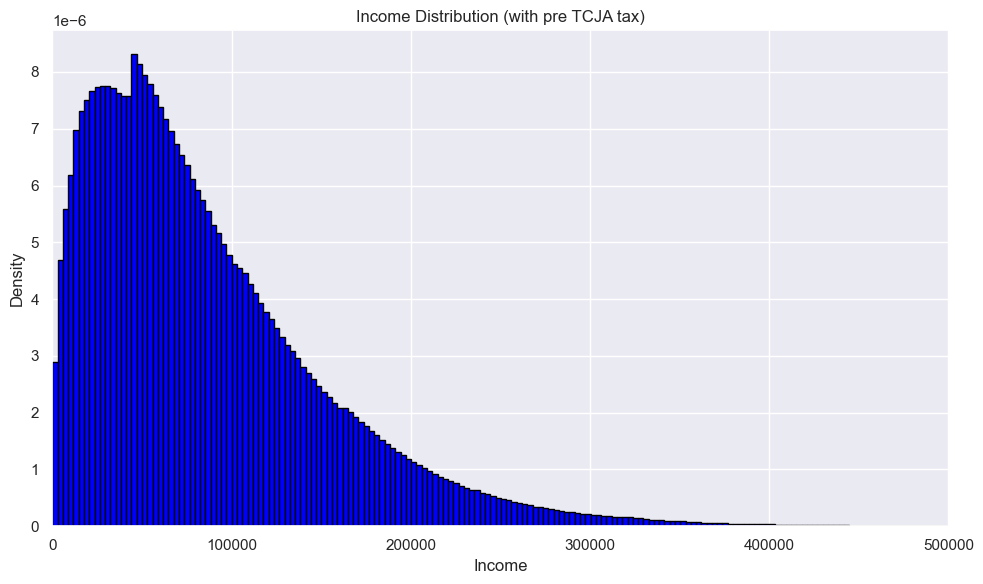

In [12]:
old_tax = np.array([calculate_tax(income) for income in population])
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(population-old_tax, bins=300, color='blue', edgecolor='black', density=True)
plt.title('Income Distribution (with pre TCJA tax)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.gca().ticklabel_format(axis='x', style='plain', useOffset=False)
plt.grid(True)
plt.xlim(0, 500000) 
plt.tight_layout()
plt.show()

### 3b) Income Distribution after TCJA  

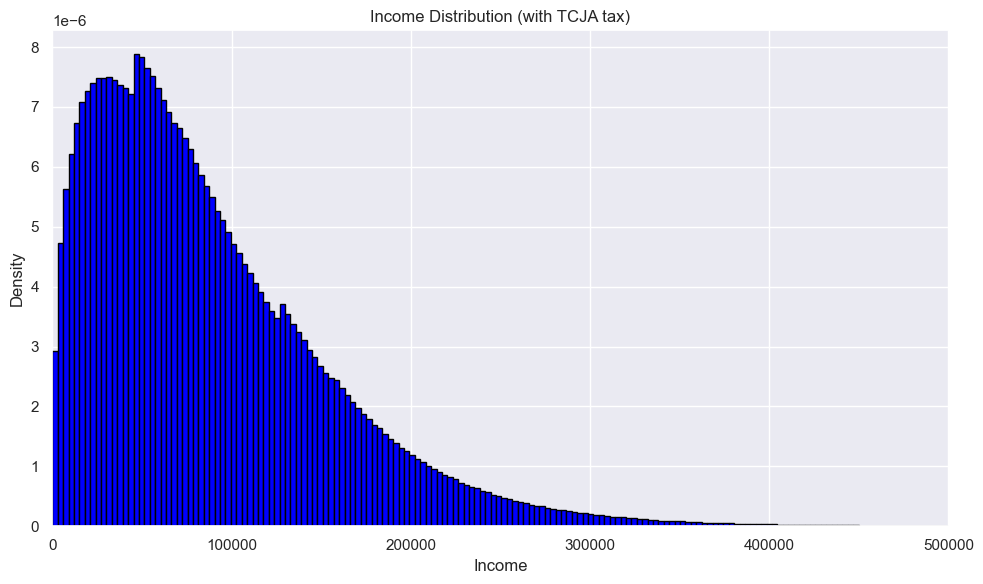

In [13]:
tcja_tax = np.array([calculate_TCJA_tax(income) for income in population])
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(population-tcja_tax, bins=300, color='blue', edgecolor='black', density=True)
plt.title('Income Distribution (with TCJA tax)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.gca().ticklabel_format(axis='x', style='plain', useOffset=False)
plt.grid(True)
plt.xlim(0, 500000) 
plt.tight_layout()
plt.show()

### 3c) Joint Plot with untaxed population, preTCJA population and TCJA population 

In [ ]:
from scipy.stats import gaussian_kde

# Plot both graphs together to see the change
kde_pretax = gaussian_kde(population)
kde_oldtax = gaussian_kde(population - old_tax)
kde_tcjatax = gaussian_kde(population - tcja_tax)

# Generate a range of income values for plotting
income_range = np.linspace(0, np.max(population), 1000)

# Plotting
plt.figure(figsize=(10, 6))

# Plot KDE for pretax income distribution
plt.plot(income_range, kde_pretax(income_range), color='blue', label='Pretax KDE')

# Plot KDE for income distribution with pre-TCJA tax
plt.plot(income_range, kde_oldtax(income_range), color='green', label='With pre TCJA Tax KDE')

# Plot KDE for income distribution with post-TCJA tax
plt.plot(income_range, kde_tcjatax(income_range), color='red', label='With TCJA Tax KDE')

plt.title('Income Distribution (KDE)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.gca().ticklabel_format(axis='x', style='plain', useOffset=False)
plt.grid(True)
plt.legend()
plt.xlim(0, 500000) 
plt.tight_layout()
plt.show()

<img src="TCJA_graph.png" alt="TCJA_graph" style="width: 70%;"/>

### 3d) Analysing Gini Coefficient 

In [14]:
# Function to calculate the Gini coefficient
def calculate_gini(population, taxrate):
    sorted_population = np.sort(population - taxrate)
    n = len(population)
    cumulative_income = np.cumsum(sorted_population)
    # Approximation formula
    gini = (1 / n) * (n + 1 - 2 * (cumulative_income / cumulative_income[-1]).sum())
    return gini

# Now apply the Gini coefficient formula
notax_gini = calculate_gini(population,0)
print(f"Pre-Tax Gini: {notax_gini}")
old_gini = calculate_gini(population,old_tax)
print(f"Pre-TCJA Gini: {old_gini}")
new_gini = calculate_gini(population,tcja_tax)
print(f"TCJA Gini: {new_gini}")

Pre-Tax Gini: 0.4340381724199836
Pre-TCJA Gini: 0.4080806907027872
TCJA Gini: 0.4036452910130039


* We note that with the implementation of TCJA Tax rate, gini coefficient fell from 0.408 to 0.404.

### 3e) Analysing Government Revenue 

In [15]:
def calculate_tax_revenue(population_incomes, tax_brackets):
    total_tax_revenue = 0
    
    for income in population_incomes:
        remaining_income = income
        taxes_paid = 0
        
        for bracket in tax_brackets:
            # The upper limit for the current bracket
            upper_limit = bracket[0]
            # The tax rate for the current bracket
            tax_rate = bracket[1]
            
            if upper_limit is None:
                # Tax the remaining income at the last bracket's rate
                taxes_paid += remaining_income * tax_rate
                break
            elif remaining_income > upper_limit:
                # Tax the income in this bracket at the bracket's rate
                taxes_paid += upper_limit * tax_rate
                # Update the remaining income
                remaining_income -= upper_limit
            else:
                # Tax the remaining income at the current rate
                taxes_paid += remaining_income * tax_rate
                break
        
        total_tax_revenue += taxes_paid
    
    return total_tax_revenue

# Define pretcja and posttcja tax brackets (upper limit and rate)
pretcja_tax_brackets = [
    (13350, 0.10),     # Up to $13350 taxed at 10%
    (50800, 0.15),    # $13350 to $50800 taxed at 15%
    (131200, 0.25),    # $50800 to $131200 taxed at 25%
    (212500, 0.28),   # $131200 to $212500 taxed at 28%
    (416700, 0.33),   # $212500 to $416700 taxed at 33%
    (444550, 0.35),   # $416700 to $444550 taxed at 35%
    (None, 0.396)      # Above $444550 taxed at 39.6%
]

pretcja_tax_revenue = calculate_tax_revenue(population, pretcja_tax_brackets)

print(f"The total tax revenue before TCJA is: ${pretcja_tax_revenue:,.2f}")

posttcja_tax_brackets = [
    (13600, 0.10),     # Up to $13600 taxed at 10%
    (51800, 0.12),    # $13600 to $51800 taxed at 12%
    (82500, 0.22),    # $51800 to $82500 taxed at 22%
    (157500, 0.24),   # $82500 to $157500 taxed at 24%
    (200000, 0.32),   # $157500 to $200000 taxed at 32%
    (500000, 0.35),   # $200000 to $500000 taxed at 35%
    (None, 0.37)      # Above $500000 taxed at 37%
]

posttcja_tax_revenue = calculate_tax_revenue(population, posttcja_tax_brackets)

print(f"The total tax revenue after TCJA is: ${posttcja_tax_revenue:,.2f}")

# Calculate the change in tax revenue
change = posttcja_tax_revenue - pretcja_tax_revenue
# Print the percentage change in tax revenue
print(f"The change in tax revenue after TCJA is: ${change:,.2f}")

# Calculate the percentage change in tax revenue
percentage_change = ((posttcja_tax_revenue - pretcja_tax_revenue) / pretcja_tax_revenue) * 100
# Print the percentage change in tax revenue
print(f"The percentage change in tax revenue after TCJA is: {percentage_change:.2f}%")


The total tax revenue before TCJA is: $222,171,126,263.63
The total tax revenue after TCJA is: $195,139,640,608.37
The change in tax revenue after TCJA is: $-27,031,485,655.26
The percentage change in tax revenue after TCJA is: -12.17%


## 4) Comparative Analysis with Belgium

Source: 
https://wisevoter.com/country-rankings/gini-coefficient-by-country/#:~:text=Finally%2C%20the%20last%20two%20countries,2

The choice of Belgium as a benchmark for analyzing tax policy implications alongside the USA, particularly post-TCJA, stems from the following reasons:

1. Progressive Taxation:
- Belgium shares a progressive tax system with USA, and applying Belgium tax rate to USA citizens can help us gather new insights into tax generation and inequality.

2. Low Income Inequality:
- With a notably low Gini coefficient of 0.272, Belgium showcases a relatively equitable income distribution. Analyzing Belgium tax rate can offer insights into effective tax-based strategies for reducing income inequality.


Analysing the tax system of Belgium gives us a few findings. Firstly, Belgium progressive income tax is broken into 4 tax brackets, comparing to USA which has 7 tax bracket. Secondly, Belgium has a significantly more aggressive tax rate which ranges from 25% to 50%. The tax bracket are as follows (iCalculator, 2023):

 - 25% for income up to €13,870
 - 40% for income from €13,870.01 to €24,480
 - 45% for income from €24,480.01 to €42,370
 - 50% for income over €42,370​



### 4a) Implementing Belgium tax rates in USA 

We convert euros to usd, based on exchange rate of 1 EUR = 1.06255 USD as of 4/11/2023. In addition, we adjust the tax rate according to USA's GDP per capita. New tax rates are:

        - 25% for income up to $20214.76
    - 40% for income from $20214.76 to $35646.77
    - 45% for income from $35646.77 to $61702.25
    - 50% for income over $61702.25

In [16]:
#Function for new tax rate
def calculate_belgium_tax(income):
    if income <= 20214.76:
        return income * 0.25
    elif income <= 35646.77:
        return 20214.76 * 0.25 + (income - 20214.76) * 0.40
    elif income <= 61702.25:
        return 20214.76 * 0.25 + (35646.77 - 20214.76) * 0.40 + (income - 35646.77) * 0.45
    else:
        return 20214.76 * 0.25 + (35646.77 - 20214.76) * 0.40 + (61702.25 - 35646.77) * 0.45 + (income - 61702.25) * 0.50


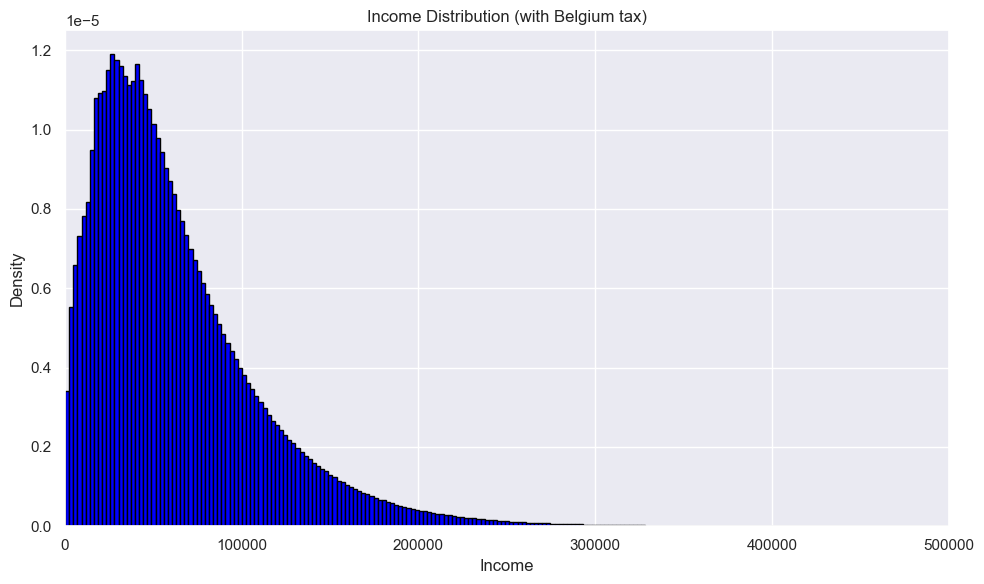

In [17]:
belgium_tax  = np.array([calculate_belgium_tax(income) for income in population])
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(population-belgium_tax, bins=300, color='blue', edgecolor='black', density=True)
plt.title('Income Distribution (with Belgium tax)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.gca().ticklabel_format(axis='x', style='plain', useOffset=False)
plt.grid(True)
plt.xlim(0, 500000) 
plt.tight_layout()
plt.show()

### 4b) Joint Plot with untaxed population, preTCJA population , TCJA population and Belgian Tax population

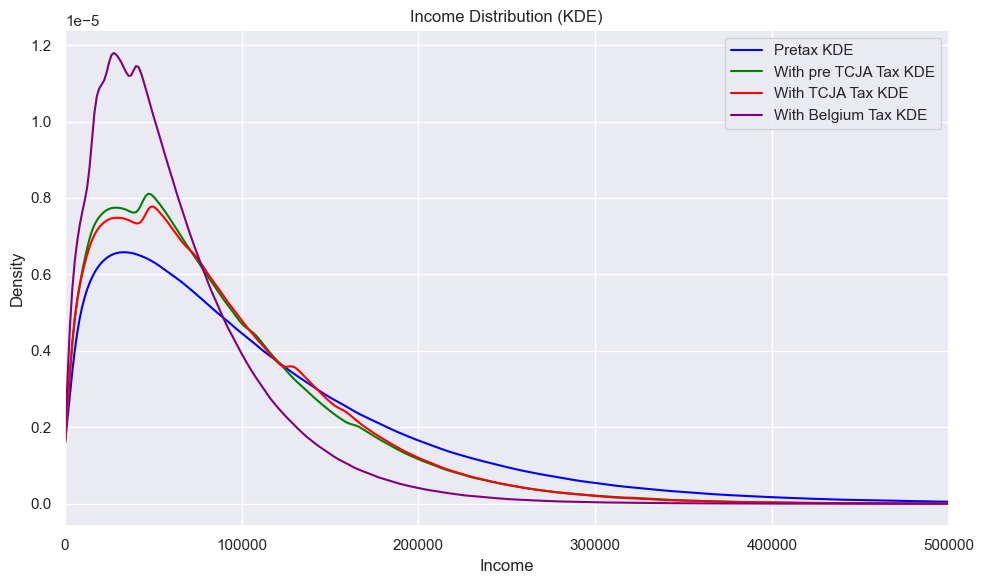

In [15]:
from scipy.stats import gaussian_kde

# Plot both graphs together to see the change
kde_pretax = gaussian_kde(population)
kde_oldtax = gaussian_kde(population - old_tax)
kde_tcjatax = gaussian_kde(population - tcja_tax)
kde_belgiumtax = gaussian_kde(population - belgium_tax)
# Generate a range of income values for plotting
income_range = np.linspace(0, np.max(population), 1000)

# Plotting
plt.figure(figsize=(10, 6))

# Plot KDE for pretax income distribution
plt.plot(income_range, kde_pretax(income_range), color='blue', label='Pretax KDE')

# Plot KDE for income distribution with pre-TCJA tax
plt.plot(income_range, kde_oldtax(income_range), color='green', label='With pre TCJA Tax KDE')

# Plot KDE for income distribution with post-TCJA tax
plt.plot(income_range, kde_tcjatax(income_range), color='red', label='With TCJA Tax KDE')

# Plot KDE for income distribution with belgium tax
plt.plot(income_range, kde_belgiumtax(income_range), color='purple', label='With Belgium Tax KDE')

plt.title('Income Distribution (KDE)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.gca().ticklabel_format(axis='x', style='plain', useOffset=False)
plt.grid(True)
plt.legend()
plt.xlim(0, 500000) 
plt.tight_layout()
plt.show()

### 4c) Comparing new Gini Coefficient to post-TCJA Gini Coefficient

In [18]:
new_gini = calculate_gini(population,tcja_tax)
print(f"TCJA Gini: {new_gini}")

belgium_gini = calculate_gini(population,belgium_tax)
print(f"Belgium Tax Rate Gini: {belgium_gini}")

TCJA Gini: 0.4036452910130039
Belgium Tax Rate Gini: 0.39545917310393197


- We note that with the implementation of TCJA Tax rate, gini coefficient fell from 0.404 to 0.395.

###  4d) Analysing Government Revenue to post-TCJA Government Revenue

In [19]:
# Define pretcja and posttcja tax brackets (upper limit and rate)
belgium_tax_brackets = [
    (20214.76, 0.25),     # Up to $20214.76 taxed at 25%
    (35646.77, 0.40),    # $20214.76 to $35646.77 taxed at 40%
    (61702.25, 0.45),    # $35646.77 to $61702.25 taxed at 45%
    (None, 0.50)      # Above $61702.25 taxed at 50%
]

belgium_tax_revenue = calculate_tax_revenue(population, belgium_tax_brackets)

print(f"The total tax revenue after applying Belgium tax rates is: ${belgium_tax_revenue:,.2f}")


posttcja_tax_revenue = calculate_tax_revenue(population, posttcja_tax_brackets)

print(f"The total tax revenue after TCJA is: ${posttcja_tax_revenue:,.2f}")

# Calculate the change in tax revenue
change1 = belgium_tax_revenue - posttcja_tax_revenue
# Print the percentage change in tax revenue
print(f"The change in tax revenue compared to post-TCJA tax is: ${change1:,.2f}")

# Calculate the percentage change in tax revenue
percentage_change1 = ((belgium_tax_revenue - posttcja_tax_revenue) / posttcja_tax_revenue) * 100
# Print the percentage change in tax revenue
print(f"The percentage change in tax revenue compared to post-TCJA is: {percentage_change1:.2f}%")


The total tax revenue after applying Belgium tax rates is: $461,693,716,568.89
The total tax revenue after TCJA is: $195,139,640,608.37
The change in tax revenue compared to post-TCJA tax is: $266,554,075,960.52
The percentage change in tax revenue compared to post-TCJA is: 136.60%


### 5) Additional Analysis on TCJA

We compute the following:

1. Income shares by quintile 
2. Lorenz Curve

In [ ]:
# Vectorize the tax function
vectorized_tax = np.vectorize(calculate_TCJA_tax)
vectorized_tax1 = np.vectorize(calculate_tax)

# Calculate post-tax income for each individual after TCJA
post_tax_income_TCJA = population - vectorized_tax(population)

# Sort the post-tax income
sorted_post_tax_TCJA = np.sort(post_tax_income_TCJA)

# Calculate total post-tax income
total_post_tax_income_TCJA = np.sum(sorted_post_tax_TCJA)

# Calculate income shares for each quintile after TCJA
income_shares_TCJA = []
for i in range(5):
    start_index = i * quintile_size
    end_index = start_index + quintile_size
    quintile_income_TCJA = np.sum(sorted_post_tax_TCJA[start_index:end_index])
    income_share_TCJA = quintile_income_TCJA / total_post_tax_income_TCJA
    income_shares_TCJA.append(income_share_TCJA)

print("Income shares by quintile after TCJA:", income_shares_TCJA)

# Calculate post-tax income for each individual before TCJA
post_tax_income_pre_TCJA = population - vectorized_tax1(population)

# Sort the post-tax income
sorted_post_tax_pre_TCJA = np.sort(post_tax_income_pre_TCJA)

# Calculate total post-tax income
total_post_tax_income_pre_TCJA = np.sum(sorted_post_tax_pre_TCJA)

# Calculate income shares for each quintile before TCJA
income_shares_pre_TCJA = []
for i in range(5):
    start_index = i * quintile_size
    end_index = start_index + quintile_size
    quintile_income_pre_TCJA = np.sum(sorted_post_tax_pre_TCJA[start_index:end_index])
    income_share_pre_TCJA = quintile_income_pre_TCJA / total_post_tax_income_pre_TCJA
    income_shares_pre_TCJA.append(income_share_pre_TCJA)

print("Income shares by quintile before TCJA:", income_shares_pre_TCJA)


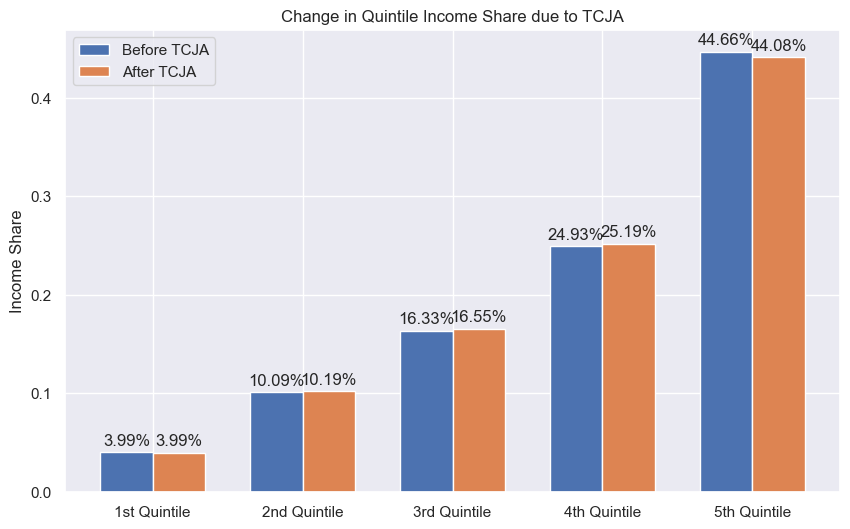

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Income shares by quintile before and after TCJA
income_shares_before = [0.03992704148016319, 0.10087641392181051, 0.16327078084389807, 0.249323357666123, 0.44660240608800594]
income_shares_after = [0.03985910629330468, 0.1019365502423991, 0.16547864708278606, 0.2518969247814561, 0.44082877160005396]

# Set the positions and width for the bars
positions = np.arange(len(income_shares_before))
width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
bar1 = plt.bar(positions - width/2, income_shares_before, width, label='Before TCJA')
bar2 = plt.bar(positions + width/2, income_shares_after, width, label='After TCJA')

# Add some text for labels, title, and custom x-axis tick labels
plt.ylabel('Income Share')
plt.title('Change in Quintile Income Share due to TCJA')
plt.xticks(positions, ['1st Quintile', '2nd Quintile', '3rd Quintile', '4th Quintile', '5th Quintile'])
plt.legend()

# Adding the data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{:.2f}%'.format(height * 100),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Show the plot
plt.show()


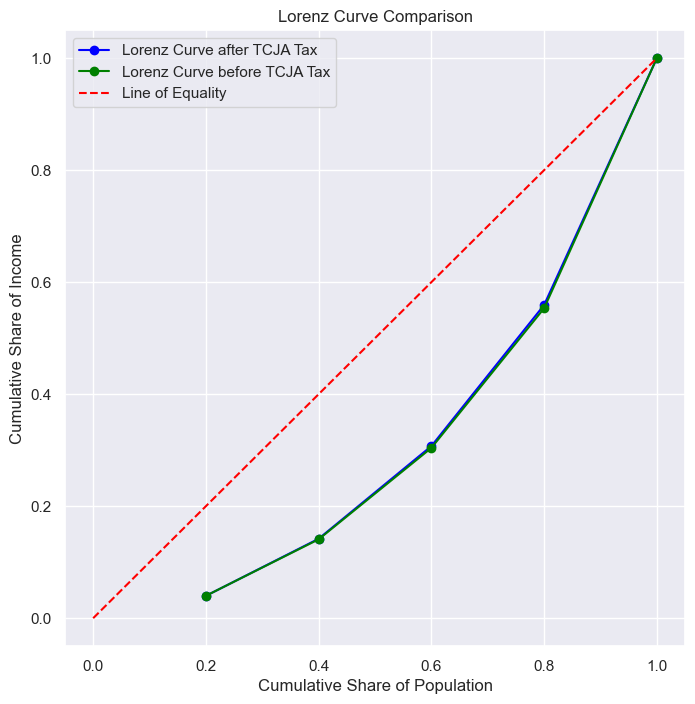

In [43]:
#Plot Lorenz Curve

# Income shares by quintile
income_shares = [0.03985910629330468, 0.1019365502423991, 0.16547864708278606, 0.2518969247814561, 0.44082877160005396]
income_shares1 = [0.03992704148016319, 0.10087641392181051, 0.16327078084389807, 0.249323357666123, 0.44660240608800594]
# Calculate cumulative shares
cumulative_population = np.cumsum([0.2, 0.2, 0.2, 0.2, 0.2])  # Evenly divided quintiles
cumulative_income = np.cumsum(income_shares)

cumulative_income1 = np.cumsum(income_shares1)
# Plot the Lorenz curve
plt.figure(figsize=(8, 8))
plt.plot(cumulative_population, cumulative_income, marker='o', color='blue', label='Lorenz Curve after TCJA Tax')
plt.plot(cumulative_population, cumulative_income1, marker='o', color='green', label='Lorenz Curve before TCJA Tax')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Line of Equality')

# Add labels and title
plt.title('Lorenz Curve Comparison')
plt.xlabel('Cumulative Share of Population')
plt.ylabel('Cumulative Share of Income')
plt.legend()

# Show the plot
plt.show()